## Explicación detallada del aprendizaje automático MLP y el análisis XAI

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap

plt.style.use('seaborn-v0_8-whitegrid')

# Carga del conjunto de datos

In [11]:
print("Análisis de Influencia de Parámetros ACO y Optimización Inteligente") 
print("Paso 1: Carga de Datos") 

path_train = '/Users/yzf/Desktop/通过TFM_Final/通过_TFM_Final/TFM_DEMO/TFM_DEMO_Dato/TFM_train.csv'
path_test = '/Users/yzf/Desktop/通过TFM_Final/通过_TFM_Final/TFM_DEMO/TFM_DEMO_Dato/TFM_test.csv'

df_train = pd.read_csv(path_train, delimiter=';')
df_test = pd.read_csv(path_test, delimiter=';')

Análisis de Influencia de Parámetros ACO y Optimización Inteligente
Paso 1: Carga de Datos


# Procesamiento de datos

In [13]:

columnas_a_eliminar = ['ID', 'Longitud del entorno', 'Ancho del entorno'] 
df_train = df_train.drop(columns=[col for col in columnas_a_eliminar if col in df_train.columns], errors='ignore')
df_test = df_test.drop(columns=[col for col in columnas_a_eliminar if col in df_test.columns], errors='ignore')


for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col] = pd.to_numeric(df_train[col].str.replace(',', '.'), errors='ignore') 
    df_test[col] = pd.to_numeric(df_test[col].str.replace(',', '.'), errors='ignore') 

Definir la variable objetivo

In [16]:
columna_objetivo = 'Tiempo total' 
X_train = df_train.drop(columns=[columna_objetivo])
y_train = df_train[columna_objetivo]
X_test = df_test.drop(columns=[columna_objetivo])
y_test = df_test[columna_objetivo]

caracteristica_categorica = 'Núm_Obstáculos' 
if caracteristica_categorica in X_train.columns:
    caracteristicas_combinadas = pd.concat([X_train, X_test], keys=['train', 'test'])
    combinadas_codificadas = pd.get_dummies(caracteristicas_combinadas, columns=[caracteristica_categorica], 
                                          drop_first=True, prefix='Num_Obstaculos') 
    
    X_train_codificado = combinadas_codificadas.loc['train']
    X_test_codificado = combinadas_codificadas.loc['test']
else:
    X_train_codificado = X_train.copy()
    X_test_codificado = X_test.copy()

escalador = StandardScaler()
X_train_escalado_np = escalador.fit_transform(X_train_codificado) 
X_test_escalado_np = escalador.transform(X_test_codificado) 

nombres_caracteristicas = X_train_codificado.columns
X_train_escalado = pd.DataFrame(X_train_escalado_np, columns=nombres_caracteristicas, index=X_train_codificado.index)
X_test_escalado = pd.DataFrame(X_test_escalado_np, columns=nombres_caracteristicas, index=X_test_codificado.index)

print(f"Número de características después del preprocesamiento: {X_train_escalado.shape[1]}") 
print(f"Nombres de las características: {nombres_caracteristicas.tolist()}") 


Número de características después del preprocesamiento: 16
Nombres de las características: ['Núm_hormigas', 'Iteraciones', 'Alpha', 'Beta', 'Rho', 'Núm_sub', 'Longitud_operativa', 'Longitud no operativa', 'Longitud total', 'Número de giros en operación', 'Número de giros No operación', 'Número total de giros', 'Num_Obstaculos_1', 'Num_Obstaculos_2', 'Num_Obstaculos_3', 'Num_Obstaculos_4']


# Entrenamiento y evaluación del modelo de regresión MLP

In [18]:
print("\nPaso 3: Entrenamiento del Modelo de Regresión MLP") 

modelo_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=1000,
    random_state=42,
    learning_rate_init=0.001,
    early_stopping=True,
    n_iter_no_change=20
)

modelo_mlp.fit(X_train_escalado, y_train)

y_pred_train = modelo_mlp.predict(X_train_escalado)
y_pred_test = modelo_mlp.predict(X_test_escalado)



Paso 3: Entrenamiento del Modelo de Regresión MLP


# Evaluación del modelo MLP


=== Evaluación del Rendimiento del Modelo MLP ===
Conjunto de entrenamiento - MSE: 0.0058, R²: 0.9782, MAE: 0.0341
Conjunto de prueba - MSE: 0.0248, R²: 0.8887, MAE: 0.0892


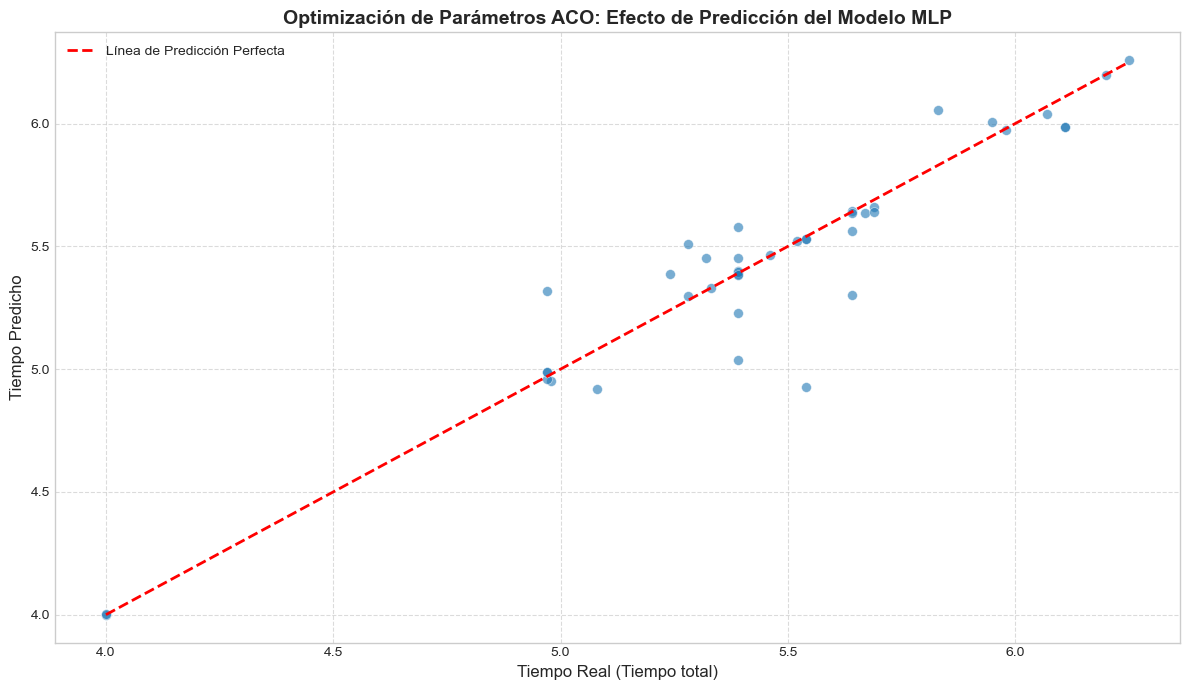

In [20]:
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\n=== Evaluación del Rendimiento del Modelo MLP ===") 
print(f"Conjunto de entrenamiento - MSE: {train_mse:.4f}, R²: {train_r2:.4f}, MAE: {train_mae:.4f}") 
print(f"Conjunto de prueba - MSE: {test_mse:.4f}, R²: {test_r2:.4f}, MAE: {test_mae:.4f}") 

plt.figure(figsize=(12, 7))
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolors='w', linewidth=0.5, s=50) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de Predicción Perfecta') 
plt.xlabel(f'Tiempo Real ({columna_objetivo})', fontsize=12) 
plt.ylabel('Tiempo Predicho', fontsize=12) 
plt.title('Optimización de Parámetros ACO: Efecto de Predicción del Modelo MLP', fontsize=14, fontweight='bold') 
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

# Análisis de interpretabilidad de SHAP

In [24]:

tamano_fondo = min(200, X_train_escalado_np.shape[0])
indices_fondo = np.random.choice(X_train_escalado_np.shape[0], tamano_fondo, replace=False)
datos_fondo_np = X_train_escalado_np[indices_fondo]


predictor_mlp = lambda x: modelo_mlp.predict(pd.DataFrame(x, columns=nombres_caracteristicas) if isinstance(x, np.ndarray) and x.ndim == 2 and x.shape[1] == len(nombres_caracteristicas) else x)
explicador = shap.KernelExplainer(predictor_mlp, datos_fondo_np) #numpy

print(f"Calculando valores SHAP para el conjunto de prueba completo...") 

valores_shap = explicador.shap_values(X_test_escalado_np)


Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Calculando valores SHAP para el conjunto de prueba completo...


  0%|          | 0/41 [00:00<?, ?it/s]

# Análisis visual SHAP

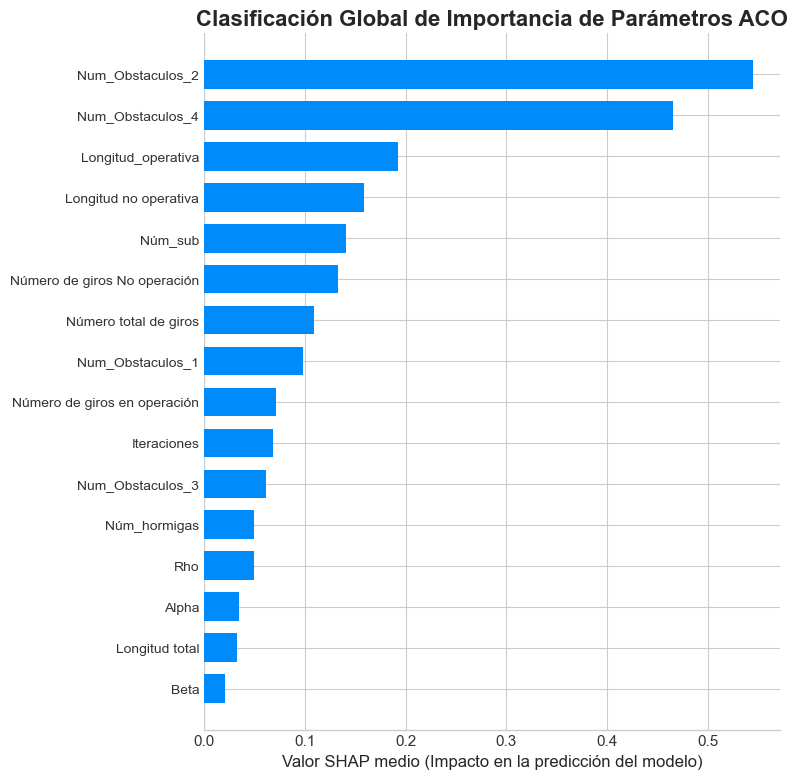

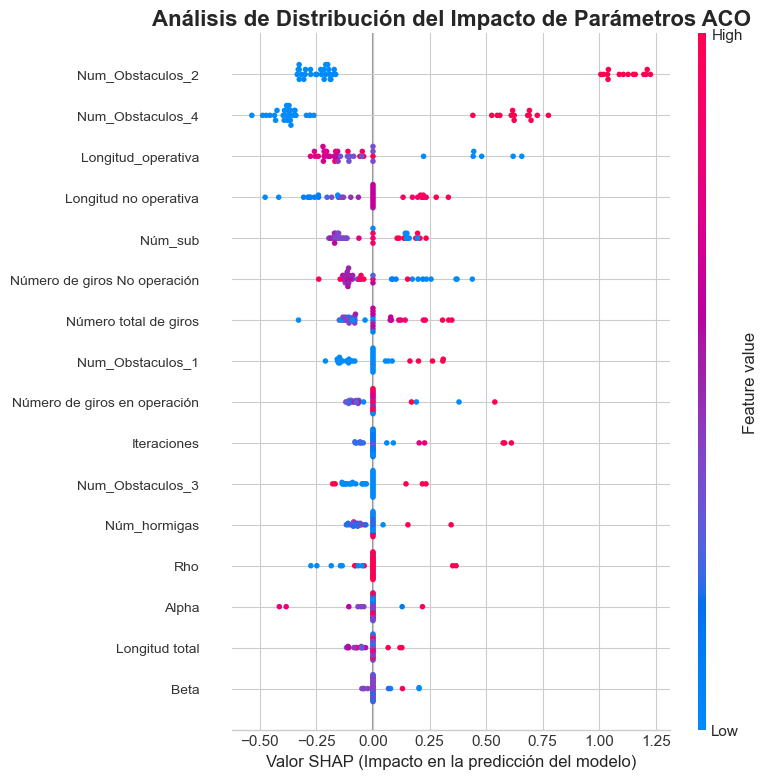

In [26]:

plt.figure(figsize=(12, 8)) 
shap.summary_plot(valores_shap, X_test_escalado, plot_type="bar", show=False) 
plt.title('Clasificación Global de Importancia de Parámetros ACO', fontsize=16, fontweight='bold') 
plt.xlabel("Valor SHAP medio (Impacto en la predicción del modelo)", fontsize=12) 
plt.yticks(fontsize=10) 
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8)) 
shap.summary_plot(valores_shap, X_test_escalado, show=False) 
plt.title('Análisis de Distribución del Impacto de Parámetros ACO', fontsize=16, fontweight='bold') 
plt.xlabel("Valor SHAP (Impacto en la predicción del modelo)", fontsize=12) 
plt.yticks(fontsize=10) 
plt.tight_layout()
plt.show()

